In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("application_data.csv")
prev = pd.read_csv("previous_application.csv")
data.shape

(49999, 122)

# Handling Missing Data

In [3]:
nulls = data.isnull().sum()
nulls.sum()

1488212

In [4]:
# Removes the columns with more than 10K missing values

data.dropna( axis=1, thresh=40000, inplace=True)
data.shape

(49999, 72)

In [5]:
# Filling the Missing the values with the respective column mean

for col in data.select_dtypes(include=['int64', 'float64']):
    data[col].fillna( value=data[col].mean(), inplace=True)
    
data.drop_duplicates()

data.info()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,...,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,...,0.008500,0.000700,0.000520,0.00038,0.007096,0.007512,0.032382,0.270288,0.260973,1.881035
std,16690.512048,0.272102,0.724039,5.318191e+05,4.024154e+05,14562.798799,3.697127e+05,0.013761,4361.400270,140794.605668,...,0.091805,0.026449,0.022798,0.01949,0.081589,0.100457,0.180538,0.863768,0.564641,1.734916
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114570.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19644.000000,-2786.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,129076.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15731.000000,-1221.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.881035
75%,143438.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12378.500000,-292.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.270288,0.260973,3.000000
max,157875.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.00000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


In [6]:
nulls = data.isnull().sum()
nulls.sum()

192

# Outlier Detection

In [7]:
# Feature Columns are selected with the help of the previous application data

feature_columns = data.select_dtypes(include=['int64','float64']).columns.intersection(prev.columns)
feature_columns = feature_columns.to_list()

In [8]:
feature_columns.pop(0)

'SK_ID_CURR'

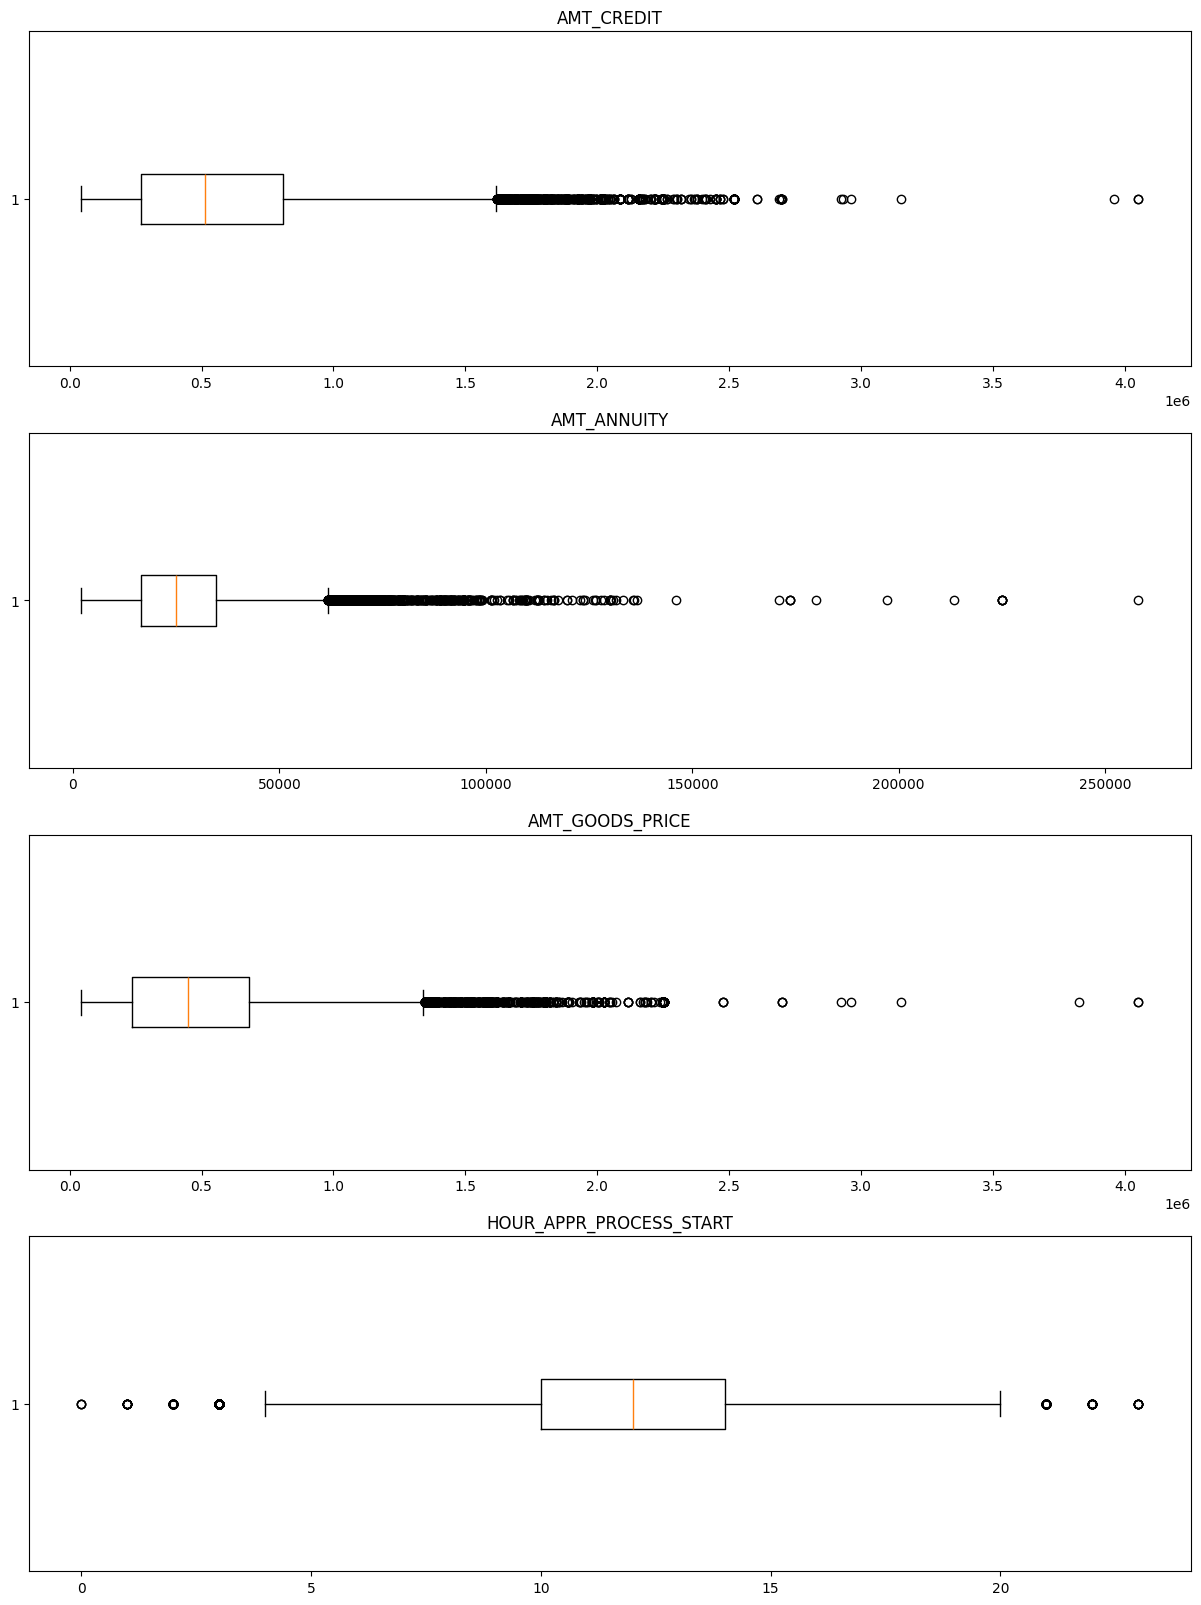

In [9]:
plt.figure( figsize=(20, 20) )

i=1
for col in feature_columns:   
    
        plt.subplot( 4, 1, i)
        plt.boxplot( data[col], vert=False )
    
        plt.title(col)
        i+=1

plt.show()

In [10]:
data.shape

(49999, 72)

In [11]:
# Outerlier deletion with Inter-Quartile Range

for col in feature_columns:
    q1, q3 = np.percentile(data[col], [25, 75])
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
data.shape

(46582, 72)

In [12]:
# Outerlier deletion with Z-Score Analysis

for col in feature_columns:
    z_scores = (data[col]-data[col].mean())/data[col].std()
    data.drop( z_scores[abs(z_scores) > 3].index, axis=0, inplace=True)
    
data.shape

(46546, 72)

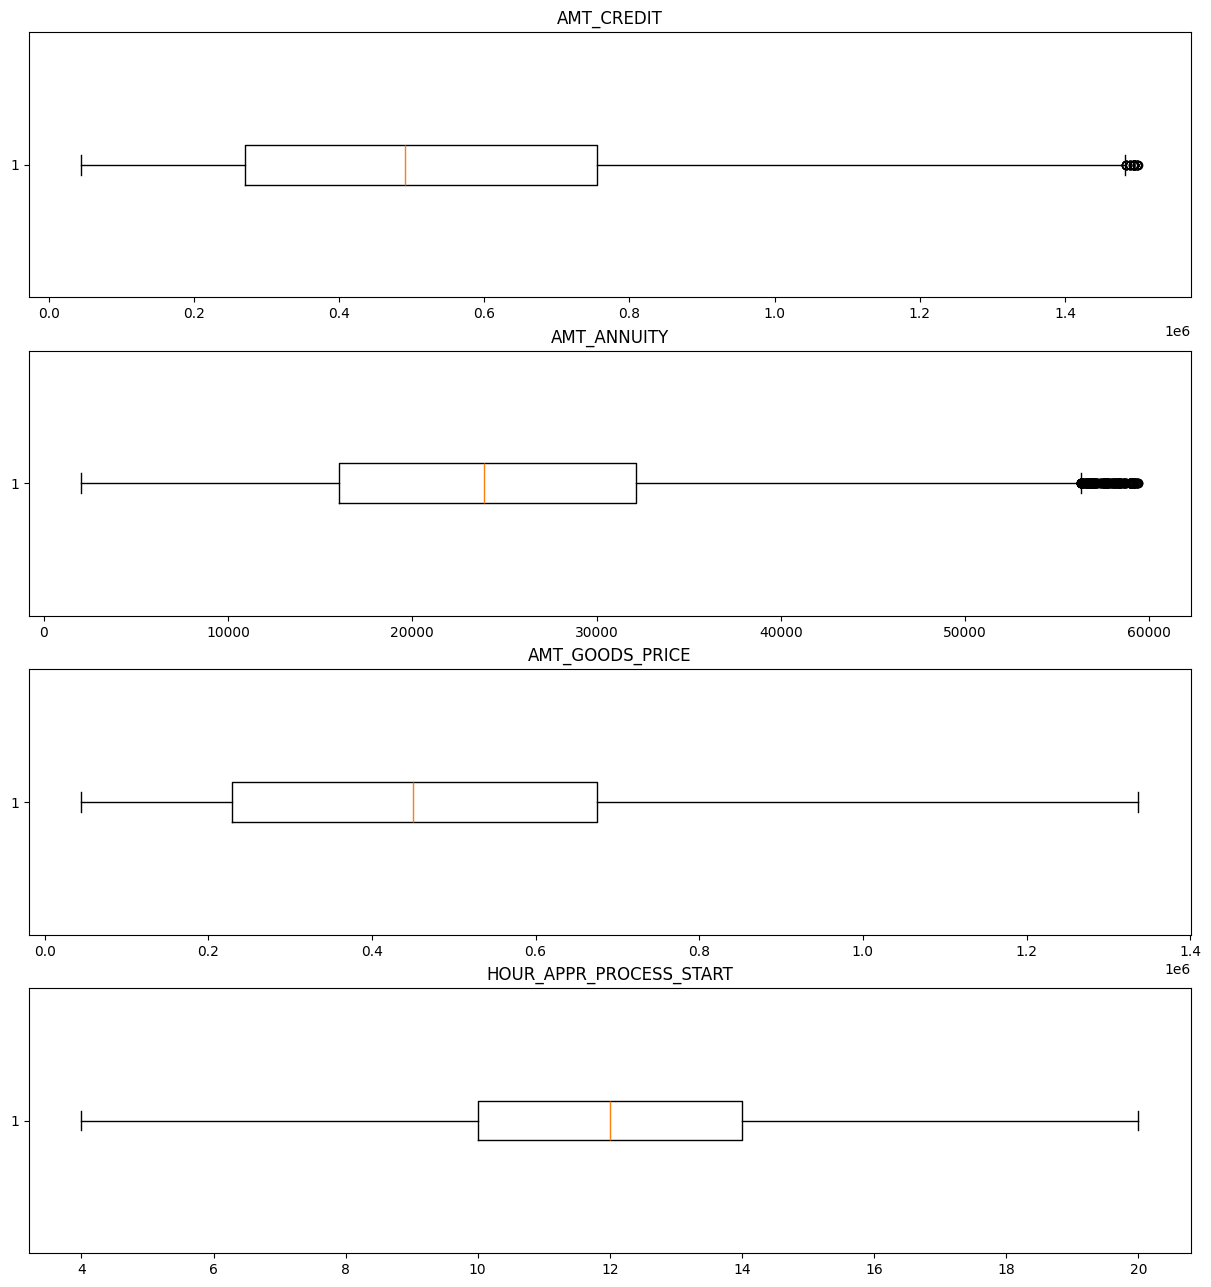

In [13]:
plt.figure( figsize=(20, 20) )

i=1
for col in feature_columns:
    
        plt.subplot( 5, 1, i)
        plt.boxplot( data[col], vert=False )
    
        plt.title(col)
        i+=1

plt.show()

# Data Imbalance

In [14]:
# Data Imbalance Ratio Calculation

ratios = []
for col in feature_columns:
    
    freq = data[col].value_counts()
    
    imbalance_ratio = max(freq)/min(freq)
    ratios.append((col, imbalance_ratio))
    
ratios

[('AMT_CREDIT', 1551.0),
 ('AMT_ANNUITY', 1039.0),
 ('AMT_GOODS_PRICE', 4181.0),
 ('HOUR_APPR_PROCESS_START', 34.23837209302326)]

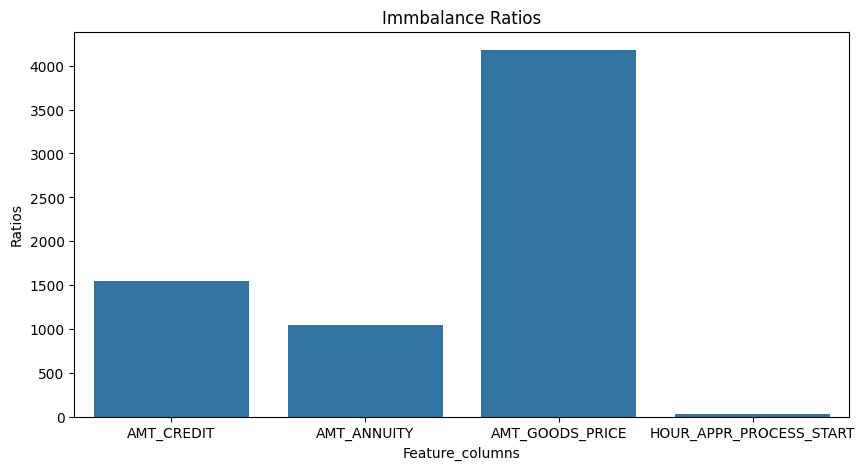

In [15]:
plt.figure(figsize=(10,5))

ratios = pd.DataFrame(ratios)
ratios.columns = ['feature', 'ratio']

sns.barplot(x='feature', y='ratio', data=ratios)
plt.title('Immbalance Ratios')

plt.xlabel('Feature_columns')
plt.ylabel('Ratio')

plt.show()

# Univariate, Segemented Univariate, Bivariate Analysis

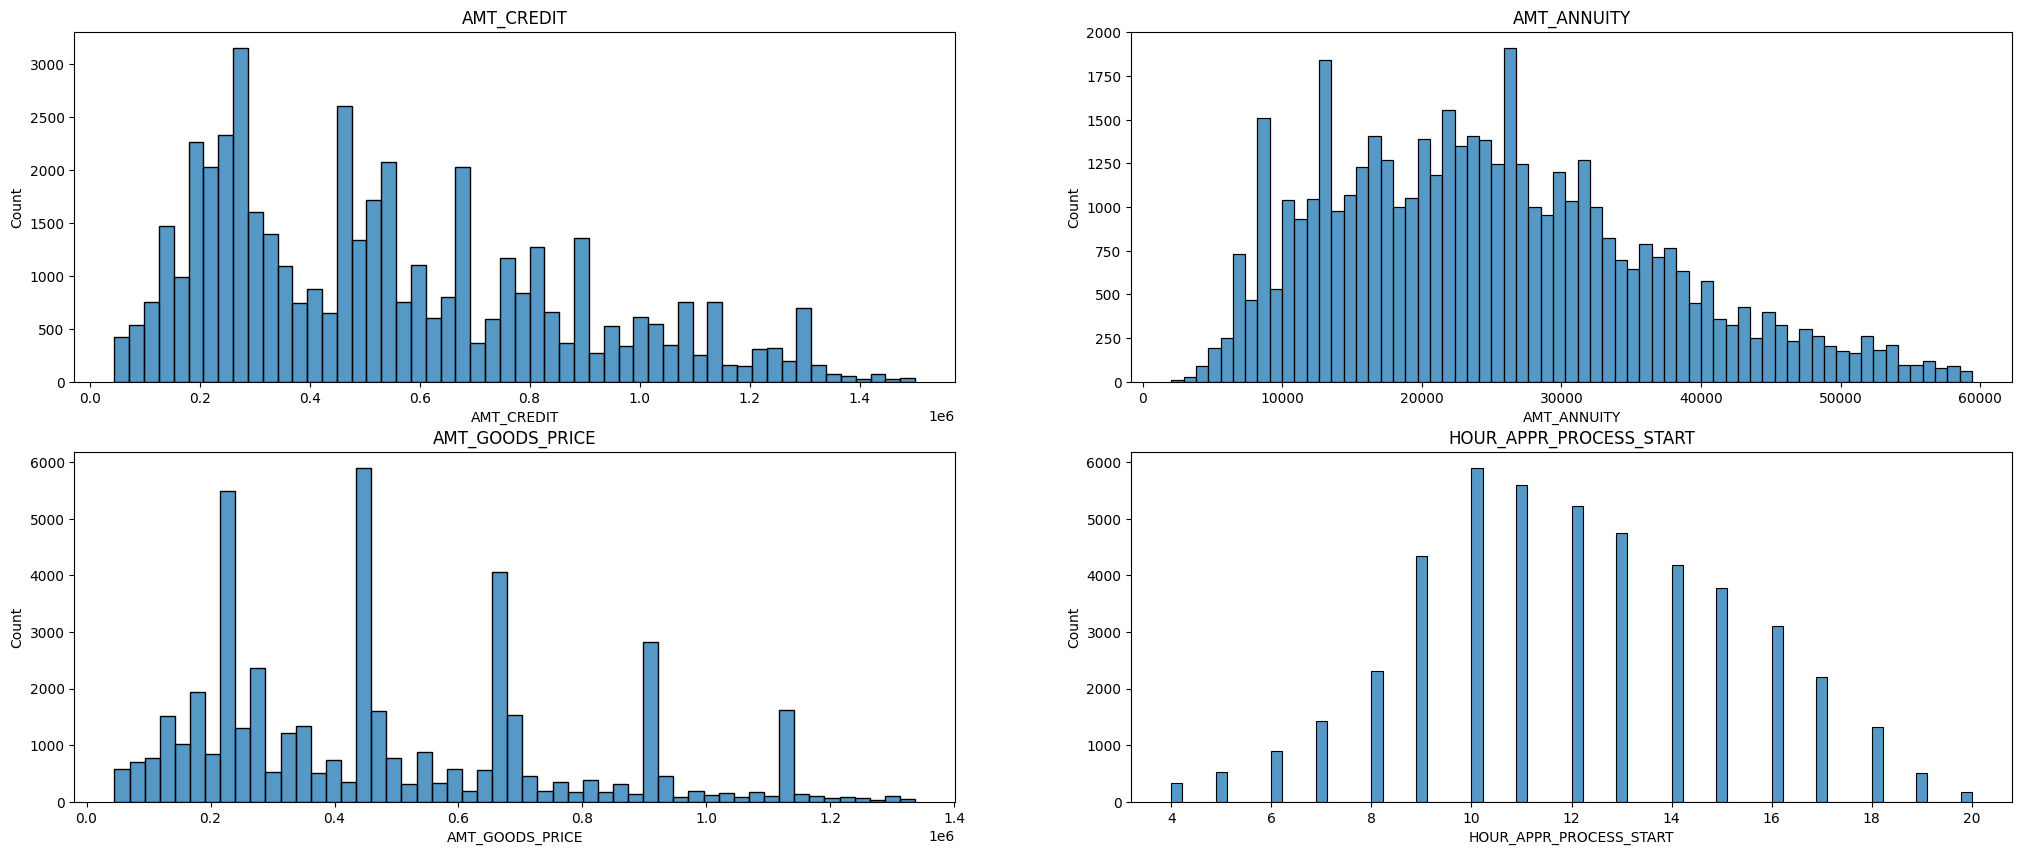

In [30]:
plt.figure(figsize=(20,20))

i=1
for col in feature_columns:
    
    plt.subplot( 2, 2, i)
    sns.histplot(data[col])
    
    plt.title(col)
    i+=1
    
plt.show()

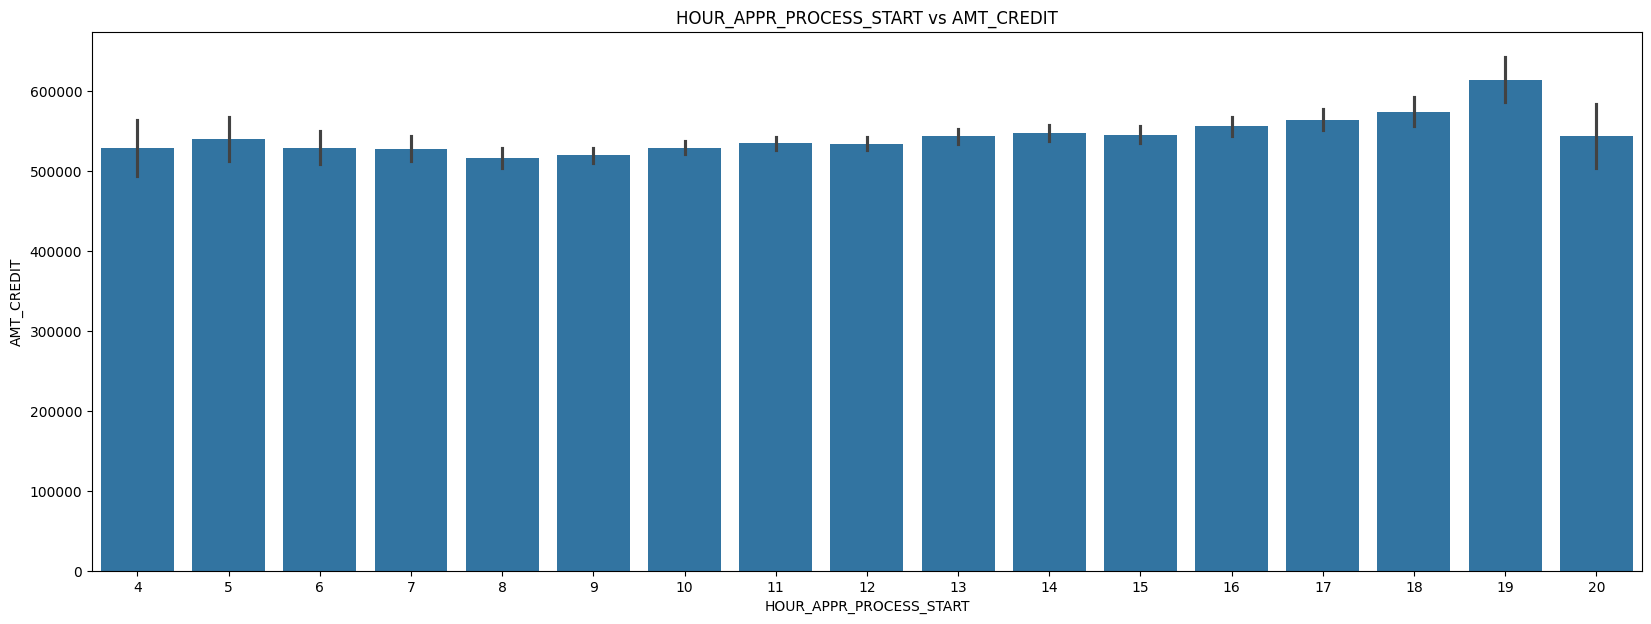

In [32]:
plt.figure(figsize=(20,7))

sns.barplot( x=feature_columns[3], y=feature_columns[0], data=data[feature_columns], fill=True)
plt.title(f'{feature_columns[3]} vs {feature_columns[0]}')

plt.show()

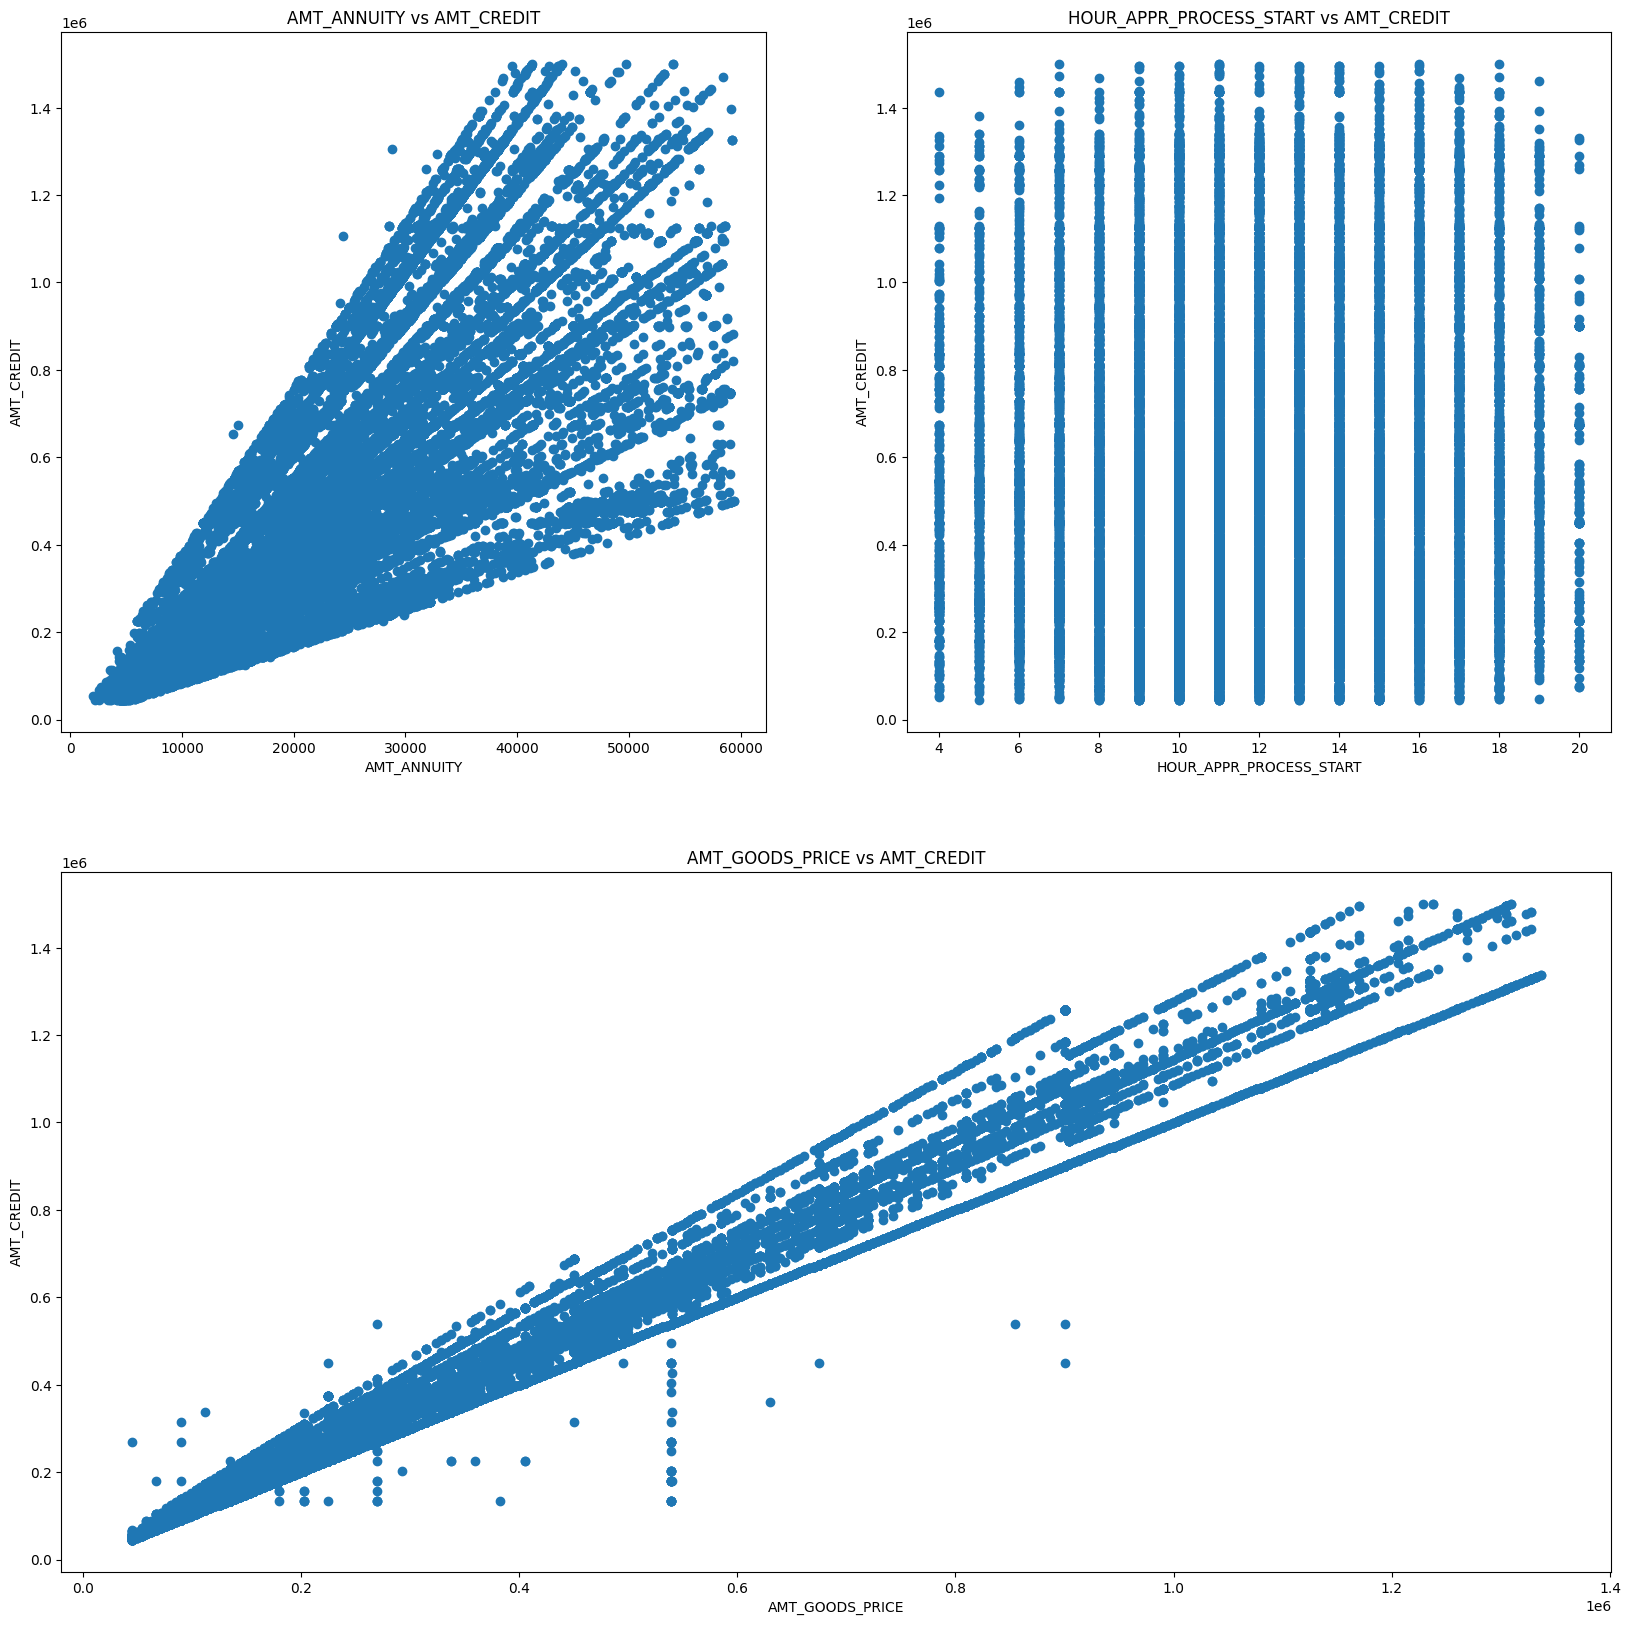

In [42]:
plt.figure(figsize=(20,20))

plt.subplot( 2, 2, 1)
plt.scatter(x=data[feature_columns[1]], y=data[feature_columns[0]])

plt.title(f'{feature_columns[1]} vs {feature_columns[0]}' )

plt.xlabel(feature_columns[1])
plt.ylabel(feature_columns[0])

plt.subplot( 2, 2, 2)
plt.scatter(x=data[feature_columns[3]], y=data[feature_columns[0]])

plt.title(f'{feature_columns[3]} vs {feature_columns[0]}' )

plt.xlabel(feature_columns[3])
plt.ylabel(feature_columns[0])


plt.subplot( 2, 2, (3,4))
plt.scatter(x=data[feature_columns[2]], y=data[feature_columns[0]])

plt.title(f'{feature_columns[2]} vs {feature_columns[0]}' )

plt.xlabel(feature_columns[2])
plt.ylabel(feature_columns[0])


plt.show()

# Correlation 

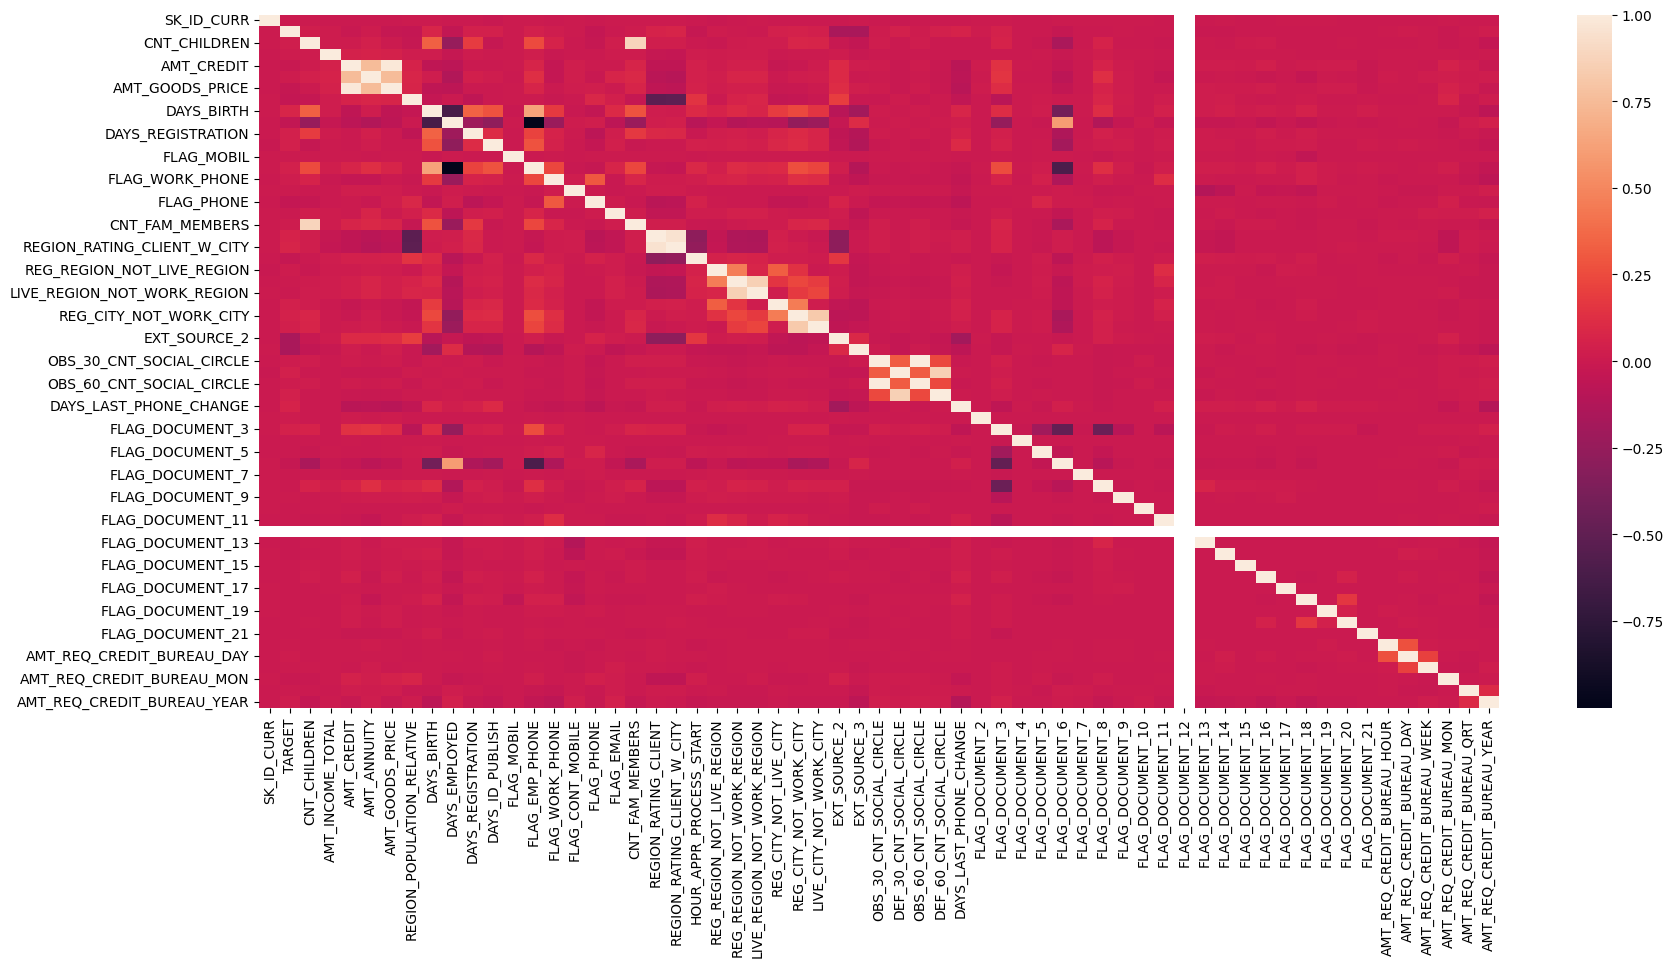

In [43]:
plt.figure( figsize=(20,9) )
sns.heatmap( data.select_dtypes(include=['int64','float64']).corr() )
plt.show()

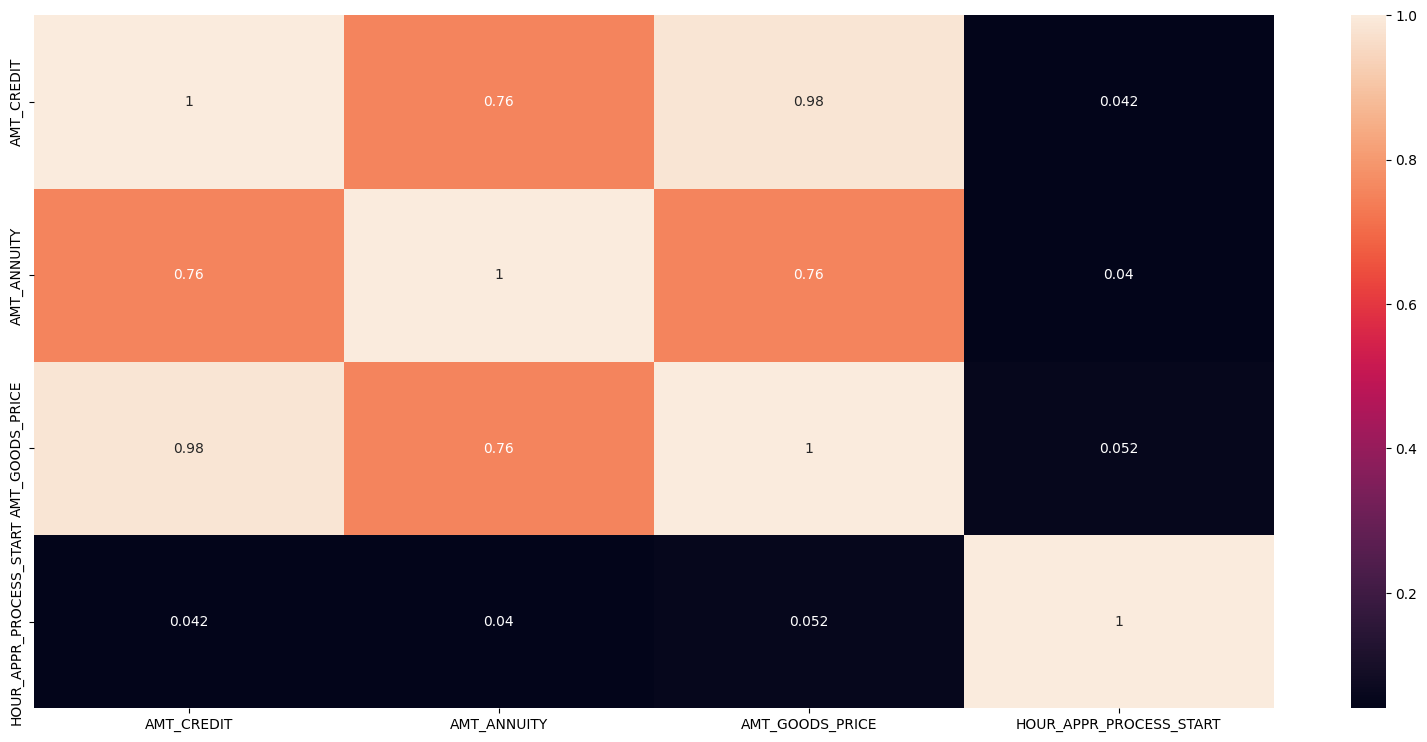

In [44]:
plt.figure( figsize=(20,9) )
sns.heatmap( data[feature_columns].corr(), annot=True )
plt.show()